# Lista 3 - Parte 1
### Questão 6

Importar as bibliotecas necessárias

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

Definir funções a serem usadas

In [5]:
def omega(T):
    '''Recebe um periodo em dias e retorna o valor de omega'''
    return 2*np.pi/T

def erro_total(pontos, T):
    '''Recebe um conjunto de dados composto por tempo, brilho, erro e um \
    periodo em dias e retorna a soma do erro ajustado em chi**2'''
    t, b, e = pontos.T
    return np.sum(np.power((b - np.sin(omega(T)*t))/e, 2))

def sumdif(a, b):
    '''Recebe dois valores a e b e retorna uma tupla com sua soma e sua \
    diferença'''
    return a + b, a - b

def melhor_w(pontos, mini, maxi, passi):
    '''Recebe um conjunto de dados (tempo, brilho erro) e as componentes \
    de um range inicial (inicio, fim, passo) e retorna o melhor omega do \
    conjunto passado a partir dos valores dados para busca'''
    mine = float('inf')
    best_T = 0
    mint = mini
    maxt = maxi
    passo = passi
    arredonda = 0
    while True:
        ts = [round(i, arredonda) for i in np.arange(mint, maxt, passo)]
        er = mine
        for t in ts:
            e = erro_total(pontos, t)
            if e < mine:
                mine, best_T = e, t
        if mine == er:
            break
        print(best_T, mine)
        maxt, mint = sumdif(best_T, passo)
        passo /= 10
        maxt += passo
        arredonda += 1
    return omega(best_T)

Importar e desempacotar os dados da primeira binária, seguido do plot inalterado dos dados

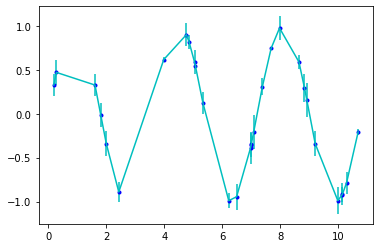

In [6]:
bin1 = np.loadtxt('binaria_eclipsante_1.dat')
bin1_t, bin1_b, bin1_e = bin1.T
plt.errorbar(bin1_t, bin1_b, yerr=bin1_e, fmt='c-')
plt.plot(bin1_t, bin1_b, 'b.')
plt.show()

Encontrar e armazenar o valor de omega de bin1 na variavel w1

In [18]:
w1 = melhor_w(bin1, 1, 5, 1)

4 113055.15262733596
3.6 2.8238971583361116e-27


Importar e desempacotar os dados da segunda binária, seguido do plot inalterado dos dados

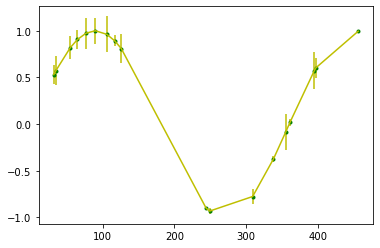

In [8]:
bin2 = np.loadtxt('binaria_eclipsante_2.dat')
bin2_t, bin2_b, bin2_e = bin2.T
plt.errorbar(bin2_t, bin2_b, yerr=bin2_e, fmt='y-')
plt.plot(bin2_t, bin2_b, 'g.')
plt.show()

Encontrar e armazenar o valor de omega de bin2 na variavel w2

In [19]:
w2 = melhor_w(bin2, 1, 500, 10)

361 0.7337755242679542
360.0 5.899896416249645e-29


### Ajuste do plot das binarias

Definir valores para criar a função sin(omega*t) de cada binária

In [10]:
sen1 = np.arange(0, 12, 0.1)
sen2 = np.arange(0, 800, 10)

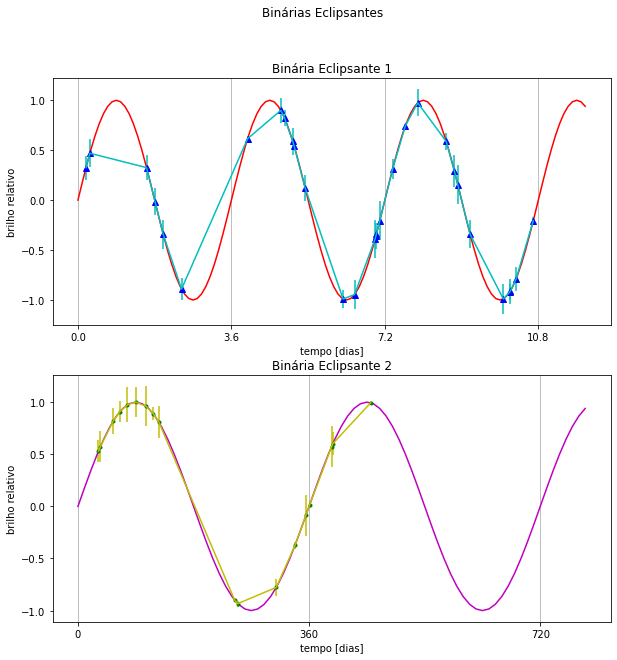

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

ax[0].plot(sen1, np.sin(w1*sen1), 'r-')
ax[0].errorbar(bin1_t, bin1_b, yerr=bin1_e, fmt='c-')
ax[0].plot(bin1_t, bin1_b, 'b^')
ax[0].grid(which='major', axis='x')
ax[0].set_title('Binária Eclipsante 1')
ax[0].set_xlabel('tempo [dias]')
ax[0].set_ylabel('brilho relativo')
ax[0].xaxis.set_major_locator(MultipleLocator(2*np.pi/w1))

ax[1].plot(sen2, np.sin(w2*sen2), 'm-')
ax[1].errorbar(bin2_t, bin2_b, yerr=bin2_e, fmt='y-')
ax[1].plot(bin2_t, bin2_b, 'g.')
ax[1].grid(which='major', axis='x')
ax[1].set_title('Binária Eclipsante 2')
ax[1].set_xlabel('tempo [dias]')
ax[1].set_ylabel('brilho relativo')
ax[1].xaxis.set_major_locator(MultipleLocator(2*np.pi/w2))


fig.suptitle('Binárias Eclipsantes')
plt.show()

In [14]:
%matplotlib widget
import ipywidgets as widgets

In [15]:
fig1, ax1 = plt.subplots(figsize=(6, 4))
ax1.set_ylim([-1.5, 1.5])
ax1.grid(True)

def slidersbin1sen(t):
    return np.sin(w1*(sen1+t))

@widgets.interact(t=(-18, 18, 0.5))
def att1(t=0):
    [l.remove() for l in ax1.lines]
    ax1.plot(sen1, slidersbin1sen(t), 'r-')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.0, description='t', max=18.0, min=-18.0, step=0.5), Output()), _dom_…

In [16]:
fig2, ax2 = plt.subplots(figsize=(6, 4))
ax2.set_ylim([-1.5, 1.5])
ax2.grid(True)

def slidersbin2(t):
    return np.sin(w2*(sen2+t))

@widgets.interact(t=(-720, 720,10))
def att2(t=0):
    [l.remove() for l in ax2.lines]
    ax2.plot(sen2, slidersbin2(t), color='m')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=0, description='t', max=720, min=-720, step=10), Output()), _dom_classes…